<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q3 Training Models (20 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**


First, be sure to run the script, from inside the scripts folder, `get_data.sh`. This will use `wget` and `unzip` to download 

http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip


http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip

and extract them to **data** and **image** folders


Since our input images are $32\times 32$ images, unrolled into one 1024 dimensional vector, that gets multiplied by $\textbf{W}^{(1)}$, each row of $\textbf{W}^{(1)}$ can be seen as a weight image. Reshaping each row into a $32\times 32$ image can give us an idea of what types of images each unit in the hidden layer has a high response to.

We have provided you three data **.mat** files to use for this section. The training data in **nist36\_train.mat** contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network. The cross-validation set in **nist36\_valid.mat** contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot over fitting. Finally, the test data in **nist36\_test.mat** contains testing data, and should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

### Q3.1 (8 points Autograder)
Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 30 epochs. **Modify** the script to generate two plots: one showing the accuracy on both the training and validation set over the epochs, and the other showing the cross-entropy loss averaged over the data. The x-axis should represent the epoch number, while the y-axis represents the accuracy or loss. With these settings, you should see an accuracy on the validation set of at least 75\%.

In [1]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *

itr: 00 	 loss: 37655.72 	 acc : 0.08
itr: 02 	 loss: 31746.81 	 acc : 0.35
itr: 04 	 loss: 25988.42 	 acc : 0.48
itr: 06 	 loss: 21826.90 	 acc : 0.55
itr: 08 	 loss: 18936.44 	 acc : 0.59
itr: 10 	 loss: 16896.75 	 acc : 0.63
itr: 12 	 loss: 15406.36 	 acc : 0.65
itr: 14 	 loss: 14271.91 	 acc : 0.67
itr: 16 	 loss: 13374.33 	 acc : 0.69
itr: 18 	 loss: 12639.92 	 acc : 0.70
itr: 20 	 loss: 12022.03 	 acc : 0.71
itr: 22 	 loss: 11490.16 	 acc : 0.72
itr: 24 	 loss: 11023.80 	 acc : 0.73
itr: 26 	 loss: 10608.74 	 acc : 0.74
itr: 28 	 loss: 10234.83 	 acc : 0.75
itr: 30 	 loss: 9894.61 	 acc : 0.76
itr: 32 	 loss: 9582.50 	 acc : 0.77
itr: 34 	 loss: 9294.17 	 acc : 0.78
itr: 36 	 loss: 9026.23 	 acc : 0.78
itr: 38 	 loss: 8776.00 	 acc : 0.79
itr: 40 	 loss: 8541.27 	 acc : 0.80
itr: 42 	 loss: 8320.27 	 acc : 0.80
itr: 44 	 loss: 8111.49 	 acc : 0.81
itr: 46 	 loss: 7913.67 	 acc : 0.81
itr: 48 	 loss: 7725.72 	 acc : 0.82
itr: 50 	 loss: 7546.71 	 acc : 0.83
itr: 52 	 loss: 7375.81

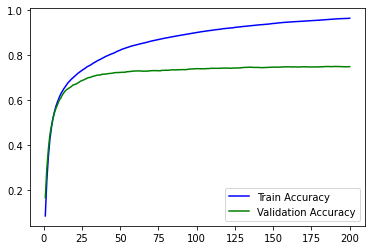

<Figure size 432x288 with 0 Axes>

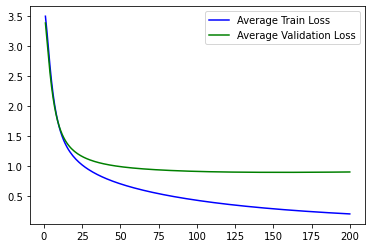

Validation accuracy:  0.7488888888888889


<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

max_iters = 200
# pick a batch size, learning rate
batch_size = 128
learning_rate = 0.001
# YOUR CODE HERE
input_dim = 1024
output_dim = 36
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
initialize_weights(input_dim,hidden_size,params,'layer1')
initialize_weights(hidden_size,output_dim,params,'output')

train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    for xb,yb in batches:
        
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE
        
        # forward
        # YOUR CODE HERE
        z1 = forward(xb, params, "layer1", activation=sigmoid)
        z2 = forward(z1, params, "output", activation=softmax)
            
        # loss
        # be sure to add loss and accuracy to epoch totals
        # YOUR CODE HERE
        loss, acc = compute_loss_and_acc(yb, z2)
        total_loss += loss
        total_acc += acc
            
        # backward
        # YOUR CODE HERE
        grad = z2
        grad[np.arange(z2.shape[0]), np.argmax(yb, axis=1)] -= 1
        z1_grad = backwards(grad, params, "output", activation_deriv=linear_deriv)
        backwards(z1_grad, params, "layer1", activation_deriv=sigmoid_deriv)

        # apply gradient
        # YOUR CODE HERE
        for layer in ["output", "layer1"]:
            params['W' + layer] -= learning_rate * params["grad_W" + layer]
            params['b' + layer] -= learning_rate * params["grad_b" + layer]
            
    acc = total_acc / len(batches)
    train_loss.append(total_loss / (batch_size * len(batches)))
    train_acc.append(acc)
    
    z1 = forward(valid_x, params, "layer1", activation=sigmoid)
    z2 = forward(z1, params, "output", activation=softmax)
    loss, acc = compute_loss_and_acc(valid_y, z2)
    valid_loss.append(loss / valid_y.shape[0])
    valid_acc.append(acc)
        
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc / len(batches)))

# run on validation set and report accuracy! should be above 75%
# YOUR CODE HERE
epochs = [i + 1 for i in range(max_iters)]
plt.figure()
plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
plt.legend()
plt.show()
plt.savefig("figures/3.1accuracylr{}.png".format(learning_rate))
plt.clf()
plt.figure()
plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
plt.legend()
plt.show()
plt.savefig("figures/3.1losslr{}.png".format(learning_rate))

print('Validation accuracy: ', valid_acc[-1])
#print('Max validation accuracy: ', np.max(valid_acc))
#print('Max validation accuracy index: ', np.argmax(valid_acc))
valid_acc = valid_acc[-1]

In [42]:
assert 'Wlayer1' in params
assert 'Woutput' in params


### Q3.2 (3 points Code+WriteUp)
Use your modified training script to train three networks, one with your best learning rate, one with 10 times that learning rate and one with one tenth that learning rate. Include all 6 plots in your writeup. Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [45]:
# Please put your code for Q3.2 here
# YOUR CODE HERE
def train_and_plot(learning_rate):
    train_data = scipy.io.loadmat('data/nist36_train.mat')
    valid_data = scipy.io.loadmat('data/nist36_valid.mat')

    train_x, train_y = train_data['train_data'], train_data['train_labels']
    valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

    max_iters = 200
    # pick a batch size, learning rate
    batch_size = 128
    # YOUR CODE HERE
    input_dim = 1024
    output_dim = 36
    hidden_size = 64

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers (named "layer1" and "output") here
    # YOUR CODE HERE
    initialize_weights(input_dim,hidden_size,params,'layer1')
    initialize_weights(hidden_size,output_dim,params,'output')
    
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
        
            # training loop can be exactly the same as q2!
            # YOUR CODE HERE
        
            # forward
            # YOUR CODE HERE
            z1 = forward(xb, params, "layer1", activation=sigmoid)
            z2 = forward(z1, params, "output", activation=softmax)
            
            # loss
            # be sure to add loss and accuracy to epoch totals
            # YOUR CODE HERE
            loss, acc = compute_loss_and_acc(yb, z2)
            total_loss += loss
            total_acc += acc
            
            # backward
            # YOUR CODE HERE
            grad = z2
            grad[np.arange(z2.shape[0]), np.argmax(yb, axis=1)] -= 1
            z1_grad = backwards(grad, params, "output", activation_deriv=linear_deriv)
            backwards(z1_grad, params, "layer1", activation_deriv=sigmoid_deriv)

            # apply gradient
            # YOUR CODE HERE
            for layer in ["output", "layer1"]:
                params['W' + layer] -= learning_rate * params["grad_W" + layer]
                params['b' + layer] -= learning_rate * params["grad_b" + layer]
            
        acc = total_acc / len(batches)
        train_loss.append(total_loss / (batch_size * len(batches)))
        train_acc.append(acc)
    
        z1 = forward(valid_x, params, "layer1", activation=sigmoid)
        z2 = forward(z1, params, "output", activation=softmax)
        loss, acc = compute_loss_and_acc(valid_y, z2)
        valid_loss.append(loss / valid_y.shape[0])
        valid_acc.append(acc)

    # run on validation set and report accuracy! should be above 75%
    # YOUR CODE HERE
    epochs = [i + 1 for i in range(max_iters)]
    plt.figure()
    plt.plot(epochs, train_acc, label="Train Accuracy", c='b')
    plt.plot(epochs, valid_acc, label="Validation Accuracy", c='g')
    plt.legend()
    plt.show()
    plt.savefig("figures/3.1accuracylr{}.png".format(learning_rate))
    plt.clf()
    plt.figure()
    plt.plot(epochs, train_loss, label="Average Train Loss", c='b')
    plt.plot(epochs, valid_loss, label="Average Validation Loss", c='g')
    plt.legend()
    plt.show()
    plt.savefig("figures/3.1losslr{}.png".format(learning_rate))

    print('Validation accuracy: ', valid_acc[-1])
    print('Max validation accuracy: ', np.max(valid_acc))
    print('Max validation accuracy index: ', np.argmax(valid_acc))
    
    return params

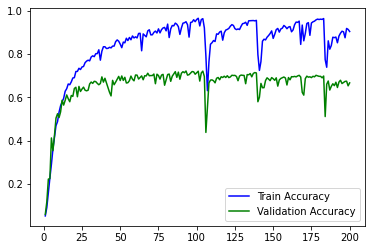

<Figure size 432x288 with 0 Axes>

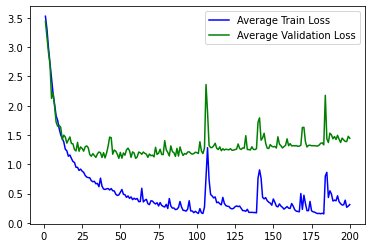

Validation accuracy:  0.6669444444444445
Max validation accuracy:  0.7219444444444445
Max validation accuracy index:  92


<Figure size 432x288 with 0 Axes>

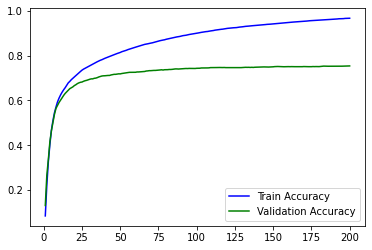

<Figure size 432x288 with 0 Axes>

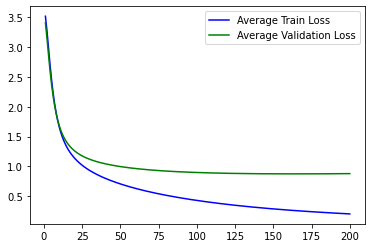

Validation accuracy:  0.7538888888888889
Max validation accuracy:  0.7538888888888889
Max validation accuracy index:  198


<Figure size 432x288 with 0 Axes>

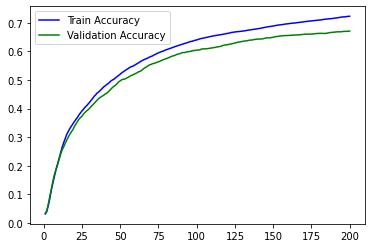

<Figure size 432x288 with 0 Axes>

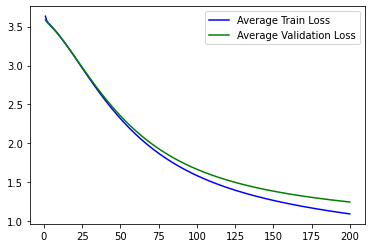

Validation accuracy:  0.6708333333333333
Max validation accuracy:  0.6708333333333333
Max validation accuracy index:  199


<Figure size 432x288 with 0 Axes>

In [44]:
train_and_plot(0.01)
train_and_plot(0.001)
train_and_plot(0.0001)

### Q3.3 (2 points Code+WriteUp)
Visualize the first layer weights that your network learned. Compare these to the network weights immediately after initialization. Include both visualizations in your writeup. Comment on the learned weights. Do you notice any patterns?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

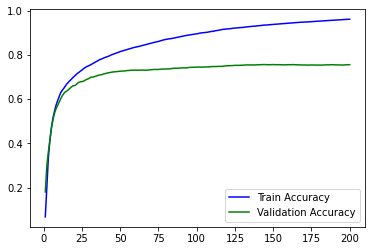

<Figure size 432x288 with 0 Axes>

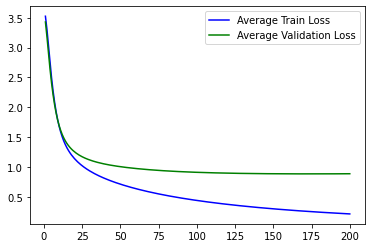

Validation accuracy:  0.7569444444444444
Max validation accuracy:  0.7577777777777778
Max validation accuracy index:  143


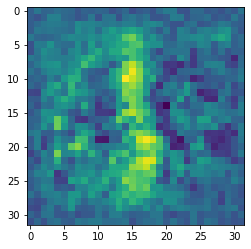

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Please put your code for Q3.3 here
# YOUR CODE HERE
params = train_and_plot(0.001)


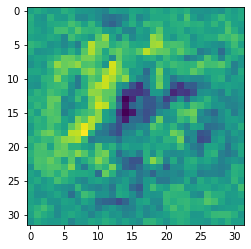

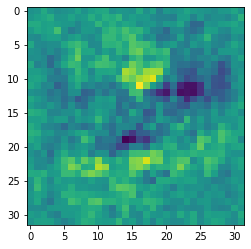

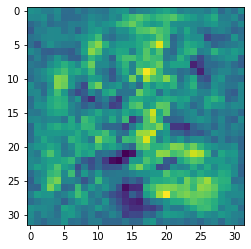

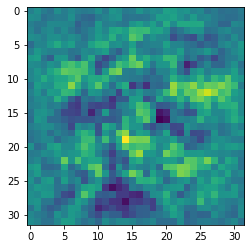

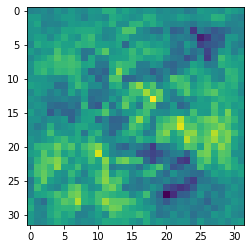

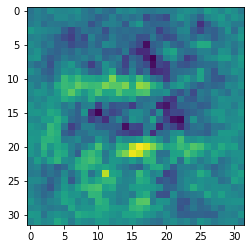

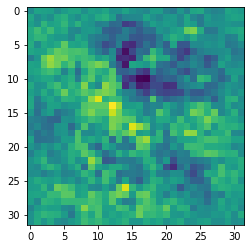

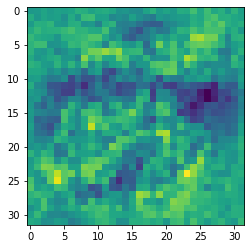

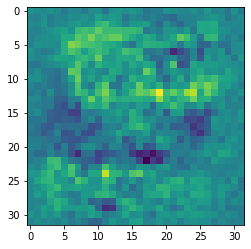

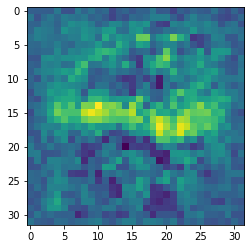

In [60]:
W = params["Wlayer1"]

for i in range(10):
    row = W.T[i]
    plt.figure()
    image = row.reshape((32, 32)).T
    plt.imshow(image)
    plt.imsave("figures/layer1_row{}.png".format(i), image)

### Q3.4 (3 points Code+WriteUp)
To visualize the deeper second layer we use the following method:

Given $y_1$ (size 64) as the output of the first layer and $y_2$ (size 36) as the output of the second layer. We will take a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) for any number $i$ in range $[0, 36)$ and multiply it with the transposed weight matrix of layer 2, $W_2^T$. Similarly multiply the output with $W_1^T$ to get back an array of the size of the input image (1024). Reshape and visualize the result.

For these values of $i$, additionally include the image in the validation set for which $y_2(i)$ attains it's maximum value.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

(3600, 36)


/home/thomaswei/miniconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


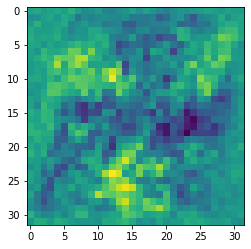

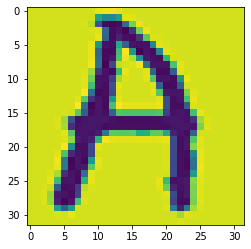

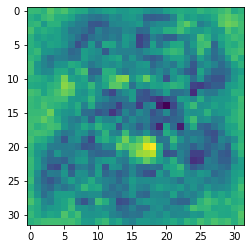

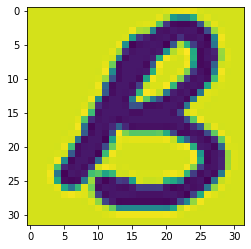

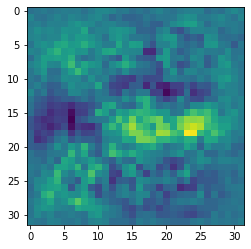

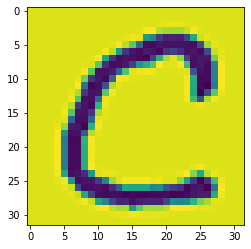

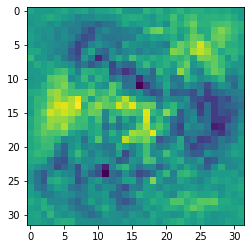

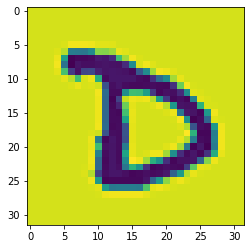

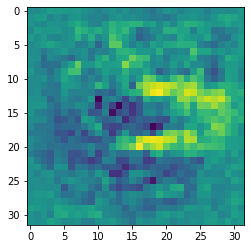

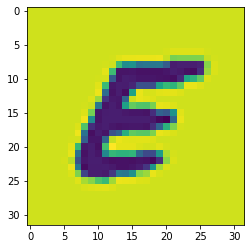

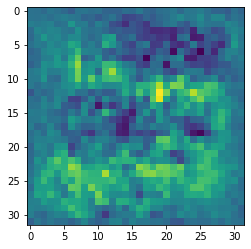

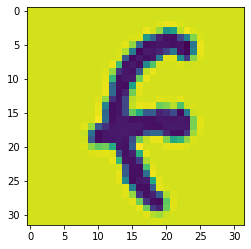

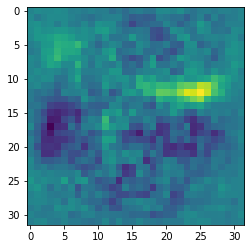

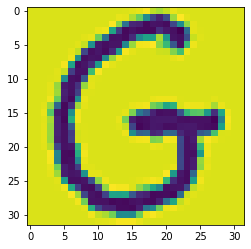

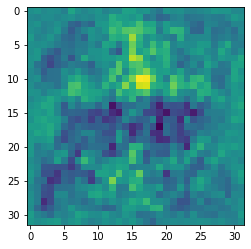

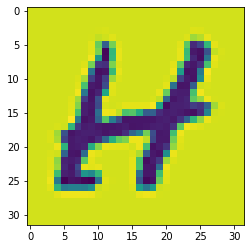

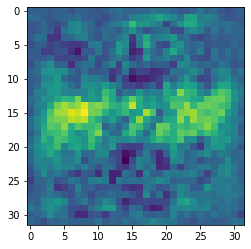

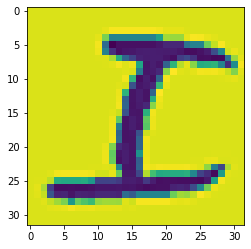

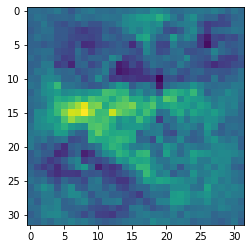

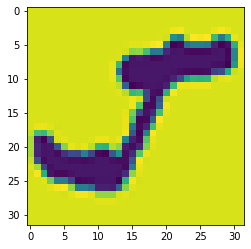

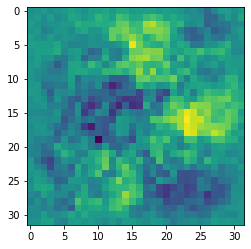

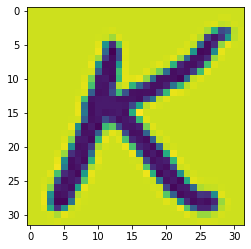

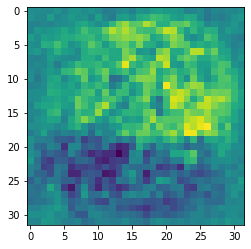

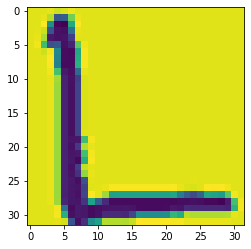

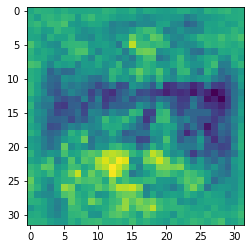

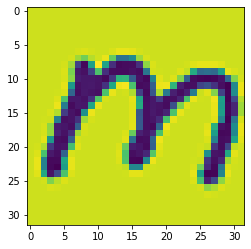

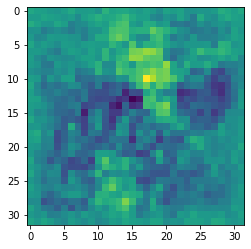

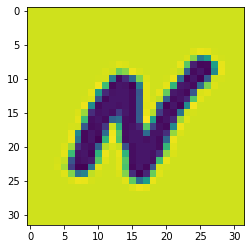

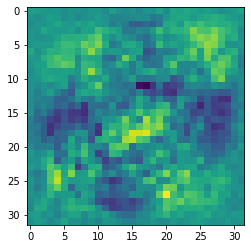

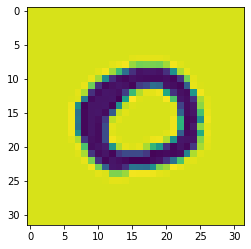

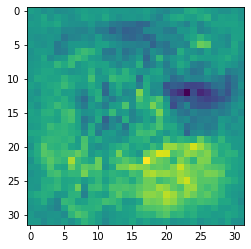

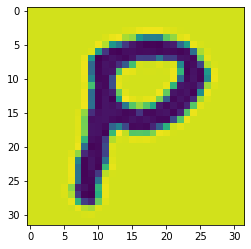

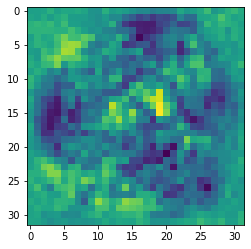

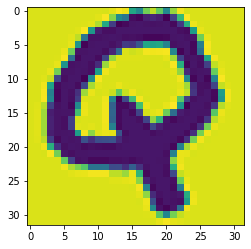

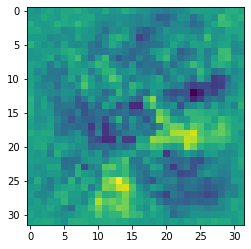

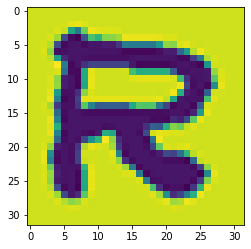

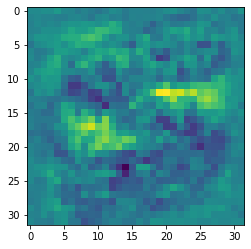

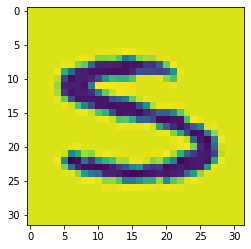

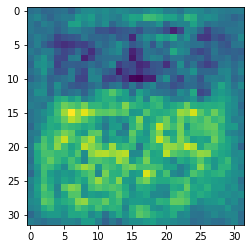

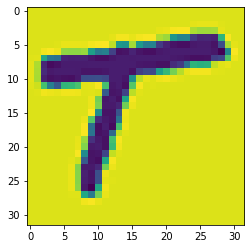

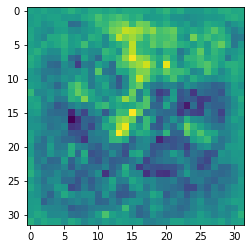

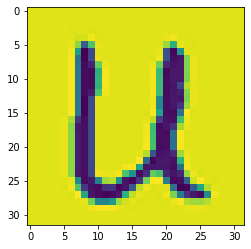

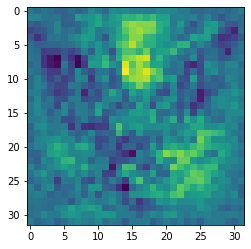

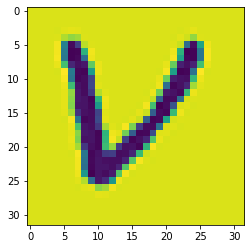

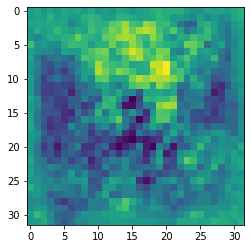

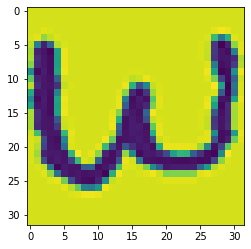

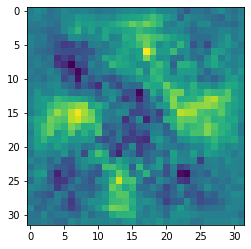

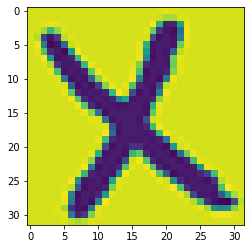

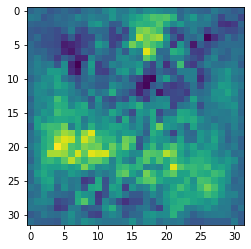

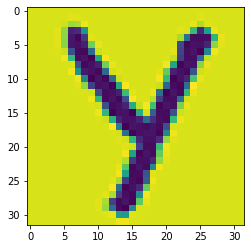

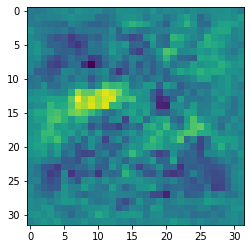

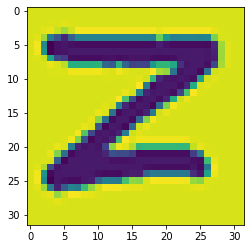

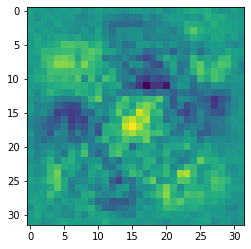

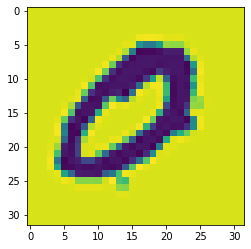

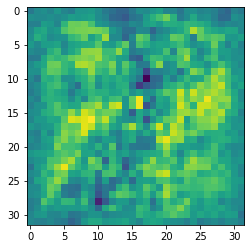

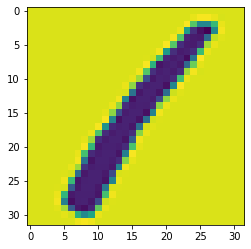

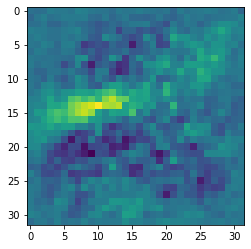

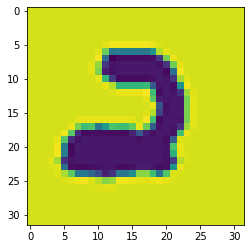

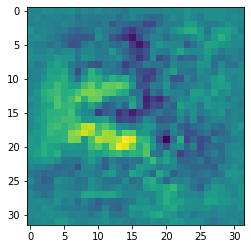

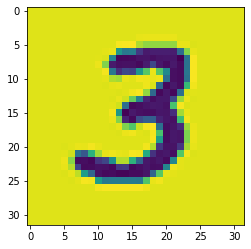

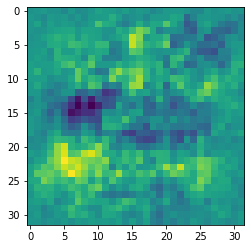

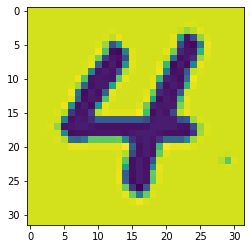

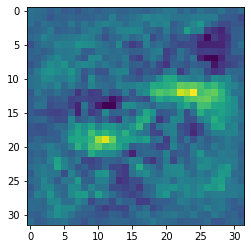

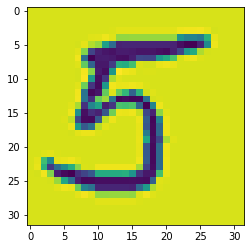

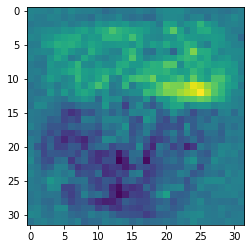

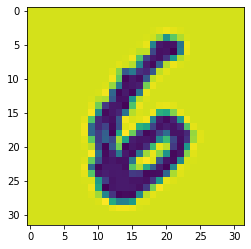

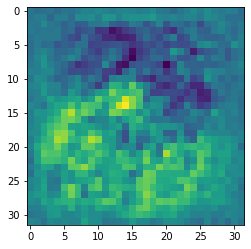

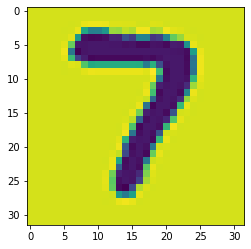

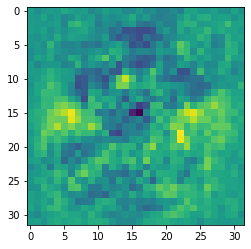

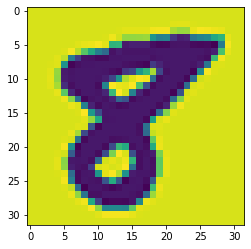

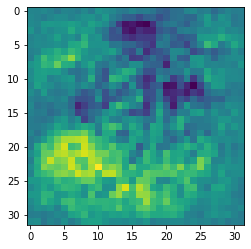

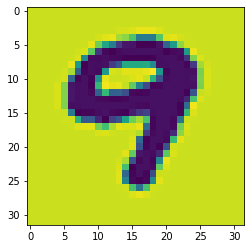

In [63]:
# Please put your code for Q3.4 here
# YOUR CODE HERE
W_1 = params["Wlayer1"]
W_2 = params["Woutput"]

z1 = forward(valid_x, params, "layer1", activation=sigmoid)
z2 = forward(z1, params, "output", activation=softmax)
print(z2.shape)

for i in range(36):
    one_hot = np.zeros((1, 36))
    one_hot[0, i] = 1
    y_1 = one_hot @ W_2.T
    y_0 = y_1 @ W_1.T
    plt.figure()
    plt.imshow(y_0.reshape((32, 32)).T)
    plt.imsave("figures/layer_2_activation_{}.png".format(i), y_0.reshape((32, 32)).T)
    max_idx = np.argmax(z2[:, i].flatten())
    plt.figure()
    plt.imshow(valid_x[max_idx].reshape(32, 32).T)
    plt.imsave("figures/max_activation_{}.png".format(i), valid_x[max_idx].reshape(32, 32).T)

### Q3.5 (4 points Code+WriteUp)
Visualize the confusion matrix for your best model for the test set. Comment on the top few pairs of classes that are most commonly confused.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

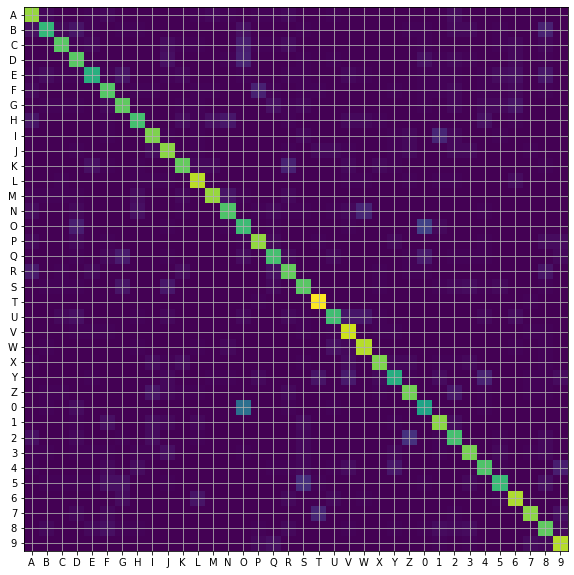

In [67]:
import matplotlib.pyplot as plt
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))
# YOUR CODE HERE
z1 = forward(valid_x, params, "layer1", activation=sigmoid)
z2 = forward(z1, params, "output", activation=softmax)
for i, probs in enumerate(z2):
    true_label = np.argmax(valid_y[i])
    assigned_label = np.argmax(probs)
    confusion_matrix[true_label, assigned_label] += 1

import string
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix,interpolation='nearest')
plt.imsave("figures/confusion_matrix.png", confusion_matrix)
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()